# WRF Forecasts Downloader

In [2]:
%load_ext autoreload
%autoreload 2

import logging
from datetime import datetime, timedelta
from typing import Union

import geopandas as gpd
import xarray as xr

from raindownloader.downloader import Downloader
from raindownloader.inpeparser import INPE, INPEParsers, INPETypes, DailyWRFParser
from raindownloader.parser import BaseParser
from raindownloader.utils import DateProcessor, FTPUtil, GISUtil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ftp = FTPUtil(server=INPEParsers.FTPurl)
download_folder='/workspaces/reports_folder/downloads/'

## Testing the Hourly Parser

In [4]:
parser = INPEParsers.hourly_wrf
parser.ftp = ftp
parser.logger.setLevel(logging.DEBUG)
parser.logger.addHandler(logging.StreamHandler())

In [5]:
parser.remote_target('20230524T071212', ref_date='20230522')

'/modelos/tempo/WRF/ams_07km/recortes/prec/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052407.grib2'

In [6]:
parser.local_target('20230525T071212', download_folder, ref_date='20230522')

PosixPath('/workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052507.grib2')

In [7]:
file = parser.download_file('20230525T071212', download_folder, ref_date='20230522')
file

PosixPath('/workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052507.grib2')

In [8]:
dset = xr.open_dataset(file)[INPETypes.HOURLY_WRF.value['var']]
print(dset.to_numpy())
dset.close()

[[0.06400013 0.07999992 0.09599972 ... 0.         0.00800037 0.00800037]
 [0.0720005  0.0880003  0.11199951 ... 0.01599979 0.01599979 0.01599979]
 [0.09599972 0.09599972 0.10400009 ... 0.01600075 0.01599979 0.01600075]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [9]:
file = parser.get_file('20230525T071212', download_folder, ref_date='20230522', force_download=False)
file

Getting INPETypes.HOURLY_WRF/25-05-2023
Checking if /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052507.grib2 exists
File /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052507.grib2 exists, and avoiding its update


PosixPath('/workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052507.grib2')

In [11]:
files = parser.get_range('20230523T130000', local_folder=download_folder, end_date='20230524T120000', ref_date='20230522')
len(files)

Getting INPETypes.HOURLY_WRF/23-05-2023
Checking if /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052313.grib2 exists
File /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052313.grib2 does not exist
Getting INPETypes.HOURLY_WRF/23-05-2023
Checking if /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052314.grib2 exists
File /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052314.grib2 does not exist
Getting INPETypes.HOURLY_WRF/23-05-2023
Checking if /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052315.grib2 exists
File /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052315.grib2 does not exist
Getting INPETypes.HOURLY_WRF/23-05-2023
Checking if /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052

24

In [13]:
dset = parser.open_file('20230525T071212', download_folder, ref_date='20230522', force_download=False)
print(dset.rio.crs)
dset.close()

Getting INPETypes.HOURLY_WRF/25-05-2023
Checking if /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052507.grib2 exists
File /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/22/00/WRF_cpt_07KM_2023052200_2023052507.grib2 exists, and avoiding its update


EPSG:4326


## Daily Forecast Parser

In [14]:
daily_wrf_parser = DailyWRFParser(
    datatype=INPETypes.DAILY_WRF,
    root="/modelos/tempo/WRF/ams_07km/recortes/prec/",
    hourly_parser=parser,
    ftp=ftp,
)

# parser = daily_wrf_parser

daily_wrf_parser.logger.setLevel(logging.DEBUG)
daily_wrf_parser.logger.addHandler(logging.StreamHandler())

In [15]:
daily_wrf_parser.local_target('20230524T071212', local_folder=download_folder, ref_date='20230522')

PosixPath('/workspaces/reports_folder/downloads/DAILY_WRF/20230522/WRF_20230522_20230524.grib2')

In [17]:
file = daily_wrf_parser.accum_daily_forecast(date='20230524', local_folder=download_folder, ref_date='20230523')
file

Getting INPETypes.HOURLY_WRF/23-05-2023
Checking if /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/23/00/WRF_cpt_07KM_2023052300_2023052313.grib2 exists
File /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/23/00/WRF_cpt_07KM_2023052300_2023052313.grib2 does not exist
Getting INPETypes.HOURLY_WRF/23-05-2023
Checking if /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/23/00/WRF_cpt_07KM_2023052300_2023052314.grib2 exists
File /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/23/00/WRF_cpt_07KM_2023052300_2023052314.grib2 does not exist
Getting INPETypes.HOURLY_WRF/23-05-2023
Checking if /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/23/00/WRF_cpt_07KM_2023052300_2023052315.grib2 exists
File /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/23/00/WRF_cpt_07KM_2023052300_2023052315.grib2 does not exist
Getting INPETypes.HOURLY_WRF/23-05-2023
Checking if /workspaces/reports_folder/downloads/HOURLY_WRF/2023/05/23/00/WRF_cpt_07KM_2023052300_2023052

PosixPath('/workspaces/reports_folder/downloads/DAILY_WRF/20230523/WRF_20230523_20230524.grib2')

In [ ]:
file = daily_wrf_parser.get_file('20230529', download_folder, ref_date='20230524')
file

Getting INPETypes.DAILY_WRF/29-05-2023
Checking if ../tmp/DAILY_WRF/20230524/WRF_20230524_20230529.grib2 exists
File ../tmp/DAILY_WRF/20230524/WRF_20230524_20230529.grib2 does not exist
Getting INPETypes.HOURLY_WRF/28-05-2023
Getting INPETypes.HOURLY_WRF/28-05-2023
Getting INPETypes.HOURLY_WRF/28-05-2023
Getting INPETypes.HOURLY_WRF/28-05-2023
Getting INPETypes.HOURLY_WRF/28-05-2023
Getting INPETypes.HOURLY_WRF/28-05-2023
Getting INPETypes.HOURLY_WRF/28-05-2023
Getting INPETypes.HOURLY_WRF/28-05-2023
Getting INPETypes.HOURLY_WRF/28-05-2023
Getting INPETypes.HOURLY_WRF/28-05-2023
Getting INPETypes.HOURLY_WRF/28-05-2023
Getting INPETypes.HOURLY_WRF/29-05-2023
Getting INPETypes.HOURLY_WRF/29-05-2023
Getting INPETypes.HOURLY_WRF/29-05-2023
Getting INPETypes.HOURLY_WRF/29-05-2023
Getting INPETypes.HOURLY_WRF/29-05-2023
Getting INPETypes.HOURLY_WRF/29-05-2023
Getting INPETypes.HOURLY_WRF/29-05-2023
Getting INPETypes.HOURLY_WRF/29-05-2023
Getting INPETypes.HOURLY_WRF/29-05-2023
Getting INPETy

PosixPath('../tmp/DAILY_WRF/20230524/WRF_20230524_20230529.grib2')

In [ ]:
# getting a 7 day range
files = daily_wrf_parser.get_range('20230525','20230531', download_folder, ref_date='20230524')

Getting INPETypes.DAILY_WRF/25-05-2023
Checking if ../tmp/DAILY_WRF/20230524/WRF_20230524_20230525.grib2 exists
File ../tmp/DAILY_WRF/20230524/WRF_20230524_20230525.grib2 does not exist
Getting INPETypes.HOURLY_WRF/24-05-2023
Getting INPETypes.HOURLY_WRF/24-05-2023
Getting INPETypes.HOURLY_WRF/24-05-2023
Getting INPETypes.HOURLY_WRF/24-05-2023
Getting INPETypes.HOURLY_WRF/24-05-2023
Getting INPETypes.HOURLY_WRF/24-05-2023
Getting INPETypes.HOURLY_WRF/24-05-2023
Getting INPETypes.HOURLY_WRF/24-05-2023
Getting INPETypes.HOURLY_WRF/24-05-2023
Getting INPETypes.HOURLY_WRF/24-05-2023
Getting INPETypes.HOURLY_WRF/24-05-2023
Getting INPETypes.HOURLY_WRF/25-05-2023
Getting INPETypes.HOURLY_WRF/25-05-2023
Getting INPETypes.HOURLY_WRF/25-05-2023
Getting INPETypes.HOURLY_WRF/25-05-2023
Getting INPETypes.HOURLY_WRF/25-05-2023
Getting INPETypes.HOURLY_WRF/25-05-2023
Getting INPETypes.HOURLY_WRF/25-05-2023
Getting INPETypes.HOURLY_WRF/25-05-2023
Getting INPETypes.HOURLY_WRF/25-05-2023
Getting INPETy

In [ ]:
len(files)

7

In [16]:
xr.open_dataset(file).rio.crs

## Using the Downloader

In [ ]:
downloader = Downloader(
    server=INPEParsers.FTPurl, 
    parsers=INPEParsers.parsers, 
    local_folder=download_folder
)

In [ ]:
file = downloader.get_file('20210502', datatype=INPETypes.YEARLY_ACCUM)
file

PosixPath('../tmp/YEARLY_ACCUM/MERGE_CPTEC_acum_2021.nc')

In [ ]:
xr.open_dataset(file)

<xarray.Dataset>
Dimensions:  (lon: 474, lat: 691, time: 1)
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -34.85 -34.75 -34.65
  * lat      (lat) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
  * time     (time) datetime64[ns] 2000-06-02T12:00:00
Data variables:
    pacum    (time, lat, lon) float64 ...

In [ ]:
dset = downloader.open_file('20220402', datatype=INPETypes.MONTHLY_ACCUM)
dset

<xarray.DataArray 'precacum' (time: 1, latitude: 924, longitude: 1001)>
[924924 values with dtype=float64]
Coordinates:
  * longitude    (longitude) float64 -120.0 -119.9 -119.8 ... -20.15 -20.05
  * latitude     (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * time         (time) datetime64[ns] 2022-04-01T12:00:00
    spatial_ref  int64 0

In [ ]:
dset = downloader.create_cube('2023-01', end_date='2023-04', datatype=INPETypes.MONTHLY_ACCUM_MANUAL)
dset

<xarray.DataArray 'monthacum' (time: 4, latitude: 924, longitude: 1001)>
array([[[  7.875 ,  64.8125,  63.    , ...,  51.75  ,  43.625 ,
          46.1875],
        [ 81.125 ,  82.375 ,  72.625 , ...,  50.25  ,  47.4375,
          43.25  ],
        [ 87.5625,  88.6875,  87.0625, ...,  47.125 ,  50.1875,
          48.375 ],
        ...,
        [ 34.0625,  34.75  ,  34.1875, ...,   7.875 ,   7.25  ,
           6.25  ],
        [ 33.0625,  33.    ,  36.75  , ...,   7.75  ,   7.1875,
           6.9375],
        [ 38.75  ,  34.5   ,  32.875 , ...,   8.0625,   7.4375,
           7.25  ]],

       [[  5.    ,  54.4375,  54.8125, ...,  76.5   ,  76.125 ,
          86.    ],
        [ 57.75  ,  56.625 ,  56.6875, ...,  87.75  ,  95.3125,
          98.875 ],
        [ 57.5   ,  57.    ,  53.5625, ...,  90.125 ,  93.    ,
          92.9375],
...
        [ 63.1875,  66.    ,  69.3125, ...,   7.    ,   6.875 ,
           5.875 ],
        [ 66.25  ,  70.8125,  73.25  , ...,   9.5625,   7.9375,
           8.125 ],
        [ 67.8125,  72.9375,  73.3125, ...,  12.875 ,  14.    ,
          12.375 ]],

       [[ 25.1875, 134.625 , 136.3125, ..., 100.5625, 100.1875,
          97.875 ],
        [136.25  , 137.6875, 134.4375, ..., 101.1875, 100.375 ,
          97.875 ],
        [147.0625, 141.3125, 129.9375, ...,  96.625 ,  99.6875,
          96.5625],
        ...,
        [  1.3125,   1.75  ,   1.625 , ...,  22.8125,  19.1875,
          20.    ],
        [  1.75  ,   2.0625,   2.5   , ...,  25.9375,  23.5   ,
          20.8125],
        [  2.1875,   2.    ,   2.    , ...,  27.3125,  25.6875,
          24.25  ]]], dtype=float32)
Coordinates:
    step         timedelta64[ns] 00:00:00
    surface      float64 0.0
  * latitude     (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude    (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-04-01T12:...

In [ ]:
downloader.data_types

[<INPETypes.DAILY_RAIN: {'id': <enum.auto object at 0xffff6e9f2bc0>, 'var': 'prec'}>,
 <INPETypes.MONTHLY_ACCUM_YEARLY: {'id': <enum.auto object at 0xffff6e9f2bf0>, 'var': 'pacum'}>,
 <INPETypes.DAILY_AVERAGE: {'id': <enum.auto object at 0xffff6e9f2c20>, 'var': 'pmed'}>,
 <INPETypes.MONTHLY_ACCUM: {'id': <enum.auto object at 0xffff6dbca6e0>, 'var': 'precacum'}>,
 <INPETypes.MONTHLY_ACCUM_MANUAL: {'id': <enum.auto object at 0xffff6dbca860>, 'var': 'monthacum'}>,
 <INPETypes.YEARLY_ACCUM: {'id': <enum.auto object at 0xffff6dbca8c0>, 'var': 'pacum'}>,
 <INPETypes.HOURLY_WRF: {'id': <enum.auto object at 0xffff6dbca8f0>, 'var': 'unknown'}>,
 <INPETypes.DAILY_WRF: {'id': <enum.auto object at 0xffff6dbca920>, 'var': 'forecast'}>]

In [ ]:
rain_cube = downloader.create_cube(
    start_date='20230501', 
    end_date='20230524',
    datatype=INPETypes.DAILY_RAIN
)

In [ ]:
rain_cube

<xarray.DataArray 'prec' (time: 24, latitude: 924, longitude: 1001)>
array([[[ 0.375 , 13.625 , 12.875 , ...,  0.    ,  0.    ,  0.    ],
        [ 8.625 ,  8.    , 10.625 , ...,  1.125 ,  0.875 ,  0.75  ],
        [ 7.75  ,  7.125 ,  6.75  , ...,  1.5   ,  0.875 ,  0.875 ],
        ...,
        [ 0.375 ,  0.375 ,  0.375 , ...,  0.25  ,  0.5   ,  0.625 ],
        [ 0.375 ,  0.375 ,  0.375 , ...,  0.125 ,  0.25  ,  0.125 ],
        [ 0.375 ,  0.375 ,  0.375 , ...,  0.    ,  0.    ,  0.    ]],

       [[ 3.25  ,  5.8125,  8.8125, ...,  0.125 ,  0.25  ,  0.125 ],
        [ 6.    ,  7.6875,  7.1875, ...,  0.125 ,  0.125 ,  0.125 ],
        [ 6.8125,  8.125 ,  7.25  , ...,  0.1875,  0.1875,  0.1875],
        ...,
        [ 0.1875,  0.1875,  0.1875, ...,  0.9375,  0.75  ,  0.3125],
        [ 0.1875,  0.1875,  0.125 , ...,  1.0625,  0.8125,  0.6875],
        [ 0.1875,  0.1875,  0.125 , ...,  2.1875,  1.75  ,  0.75  ]],

       [[ 0.    ,  4.    ,  4.8125, ...,  0.375 ,  0.3125,  0.0625],
        [ 5.0625,  5.25  ,  5.375 , ...,  0.6875,  0.5625,  0.375 ],
        [ 5.75  ,  5.875 ,  5.9375, ...,  0.5625,  0.4375,  0.375 ],
        ...,
...
        [ 1.25  ,  1.375 ,  1.125 , ...,  0.625 ,  1.25  ,  1.375 ],
        [ 0.875 ,  1.    ,  0.5   , ...,  0.75  ,  0.75  ,  1.5   ],
        [ 0.625 ,  0.5   ,  0.375 , ...,  1.375 ,  0.875 ,  0.875 ]],

       [[ 6.875 ,  8.625 ,  7.25  , ...,  0.    ,  0.    ,  0.    ],
        [ 8.75  ,  7.625 ,  7.25  , ...,  0.    ,  0.    ,  0.    ],
        [ 8.125 ,  6.875 ,  7.5   , ...,  0.    ,  0.    ,  0.    ],
        ...,
        [ 0.125 ,  0.125 ,  0.25  , ...,  0.125 ,  0.    ,  0.25  ],
        [ 0.125 ,  0.125 ,  0.125 , ...,  0.    ,  0.125 ,  0.125 ],
        [ 0.25  ,  0.125 ,  0.125 , ...,  0.125 ,  0.    ,  0.25  ]],

       [[ 1.375 ,  0.375 ,  0.375 , ...,  4.    ,  4.125 ,  4.625 ],
        [ 0.375 ,  0.25  ,  0.25  , ...,  5.375 ,  5.625 ,  6.25  ],
        [ 0.25  ,  0.25  ,  0.25  , ...,  6.125 ,  6.375 ,  6.75  ],
        ...,
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.125 ,  0.125 ,  0.125 , ...,  0.    ,  0.    ,  0.    ],
        [ 0.125 ,  0.    ,  0.125 , ...,  0.125 ,  0.125 ,  0.5   ]]],
      dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2023-05-01T12:00:00 ... 2023-05-24T12:...
    step         timedelta64[ns] 00:00:00
    surface      float64 0.0
  * latitude     (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude    (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    valid_time   (time) datetime64[ns] 2023-05-01T12:00:00 ... 2023-05-24T12:...
    spatial_ref  int64 0
Attributes: (12/29)
    GRIB_paramId:                             260138
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      924924
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Precipitation
    GRIB_shortName:                           prec
    GRIB_units:                               kg m**-2
    long_name:                                Precipitation
    units:                                    kg m**-2
    standard_name:                            unknown

In [ ]:
forecast_cube = downloader.create_cube(
    start_date='20230525', 
    end_date='20230531',
    datatype=INPETypes.DAILY_WRF,
    ref_date='20230524',
    force_download=False
)

In [ ]:
forecast_cube

<xarray.DataArray 'forecast' (time: 7, latitude: 957, longitude: 797)>
array([[[3.97600007e+00, 4.15199995e+00, 4.21600008e+00, ...,
         8.64000082e-01, 8.92000198e-01, 9.51999903e-01],
        [3.82400012e+00, 4.11999989e+00, 4.18400002e+00, ...,
         9.20000076e-01, 9.51999903e-01, 9.63999987e-01],
        [3.59999990e+00, 3.94000006e+00, 4.08799982e+00, ...,
         8.55999947e-01, 8.96000147e-01, 9.44000006e-01],
        ...,
        [8.00000057e-02, 4.00000066e-03, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [8.79999846e-02, 4.00000066e-03, 4.00000019e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.08000010e-01, 8.00000038e-03, 4.00000019e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[1.51599979e+00, 1.41599989e+00, 1.29199982e+00, ...,
         8.23999882e-01, 7.71999836e-01, 7.16000080e-01],
        [1.47200012e+00, 1.39599991e+00, 1.30399990e+00, ...,
         8.07999849e-01, 7.52000093e-01, 7.00000286e-01],
        [1.47200012e+00, 1.39599991e+00, 1.34800005e+00, ...,
         8.36000204e-01, 7.83999681e-01, 7.48000145e-01],
...
        [1.03999972e-01, 8.15999985e-01, 7.27999926e-01, ...,
         8.00001621e-03, 0.00000000e+00, 7.99998641e-03],
        [2.17599988e+00, 1.53599989e+00, 1.17600012e+00, ...,
         8.00001621e-03, 0.00000000e+00, 0.00000000e+00],
        [9.20000076e-01, 1.34399986e+00, 1.25600004e+00, ...,
         1.60000026e-02, 8.00001621e-03, 7.99995661e-03]],

       [[4.63999748e-01, 4.80000496e-01, 4.63999748e-01, ...,
         4.31999207e-01, 4.64000702e-01, 5.43998718e-01],
        [4.32000160e-01, 3.99999619e-01, 3.83999825e-01, ...,
         3.68000031e-01, 3.68000031e-01, 4.32001114e-01],
        [3.35999489e-01, 3.52000237e-01, 3.68000031e-01, ...,
         3.19999695e-01, 3.36000443e-01, 4.16000366e-01],
        ...,
        [1.47200012e+00, 3.10400009e+00, 2.70400023e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.00800037e+00, 3.20000005e+00, 2.67200017e+00, ...,
         1.60000026e-02, 0.00000000e+00, 0.00000000e+00],
        [2.84800005e+00, 3.10399985e+00, 2.30399966e+00, ...,
         0.00000000e+00, 1.60000026e-02, 0.00000000e+00]]], dtype=float32)
Coordinates:
    surface    float64 0.0
  * latitude   (latitude) float64 -54.96 -54.89 -54.82 ... 11.82 11.89 11.96
  * longitude  (longitude) float64 276.3 276.3 276.4 276.5 ... 331.8 331.9 332.0
  * time       (time) datetime64[ns] 2023-05-25T12:00:00 ... 2023-05-31T12:00:00

In [ ]:
# forecast_cube = forecast_cube.assign_coords({"longitude": forecast_cube.longitude + 360})


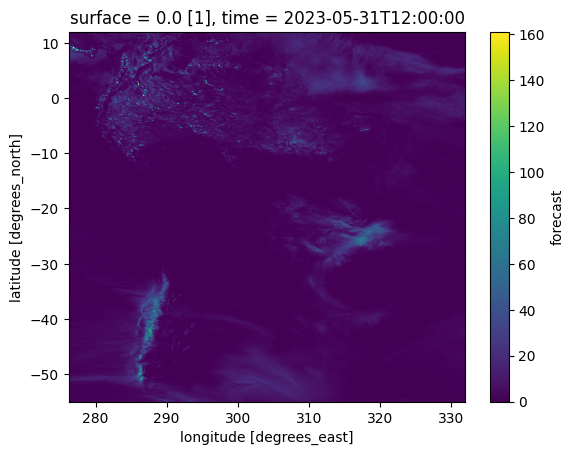

In [ ]:
forecast_cube[6].plot()

In [ ]:
rain_cube.rio.crs

CRS.from_epsg(4326)

In [ ]:
forecast_cube.rio.set_crs('epsg:4326')

<xarray.DataArray 'forecast' (time: 7, latitude: 957, longitude: 797)>
array([[[3.97600007e+00, 4.15199995e+00, 4.21600008e+00, ...,
         8.64000082e-01, 8.92000198e-01, 9.51999903e-01],
        [3.82400012e+00, 4.11999989e+00, 4.18400002e+00, ...,
         9.20000076e-01, 9.51999903e-01, 9.63999987e-01],
        [3.59999990e+00, 3.94000006e+00, 4.08799982e+00, ...,
         8.55999947e-01, 8.96000147e-01, 9.44000006e-01],
        ...,
        [8.00000057e-02, 4.00000066e-03, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [8.79999846e-02, 4.00000066e-03, 4.00000019e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.08000010e-01, 8.00000038e-03, 4.00000019e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[1.51599979e+00, 1.41599989e+00, 1.29199982e+00, ...,
         8.23999882e-01, 7.71999836e-01, 7.16000080e-01],
        [1.47200012e+00, 1.39599991e+00, 1.30399990e+00, ...,
         8.07999849e-01, 7.52000093e-01, 7.00000286e-01],
        [1.47200012e+00, 1.39599991e+00, 1.34800005e+00, ...,
         8.36000204e-01, 7.83999681e-01, 7.48000145e-01],
...
        [1.03999972e-01, 8.15999985e-01, 7.27999926e-01, ...,
         8.00001621e-03, 0.00000000e+00, 7.99998641e-03],
        [2.17599988e+00, 1.53599989e+00, 1.17600012e+00, ...,
         8.00001621e-03, 0.00000000e+00, 0.00000000e+00],
        [9.20000076e-01, 1.34399986e+00, 1.25600004e+00, ...,
         1.60000026e-02, 8.00001621e-03, 7.99995661e-03]],

       [[4.63999748e-01, 4.80000496e-01, 4.63999748e-01, ...,
         4.31999207e-01, 4.64000702e-01, 5.43998718e-01],
        [4.32000160e-01, 3.99999619e-01, 3.83999825e-01, ...,
         3.68000031e-01, 3.68000031e-01, 4.32001114e-01],
        [3.35999489e-01, 3.52000237e-01, 3.68000031e-01, ...,
         3.19999695e-01, 3.36000443e-01, 4.16000366e-01],
        ...,
        [1.47200012e+00, 3.10400009e+00, 2.70400023e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.00800037e+00, 3.20000005e+00, 2.67200017e+00, ...,
         1.60000026e-02, 0.00000000e+00, 0.00000000e+00],
        [2.84800005e+00, 3.10399985e+00, 2.30399966e+00, ...,
         0.00000000e+00, 1.60000026e-02, 0.00000000e+00]]], dtype=float32)
Coordinates:
    surface    float64 0.0
  * latitude   (latitude) float64 -54.96 -54.89 -54.82 ... 11.82 11.89 11.96
  * longitude  (longitude) float64 276.3 276.3 276.4 276.5 ... 331.8 331.9 332.0
  * time       (time) datetime64[ns] 2023-05-25T12:00:00 ... 2023-05-31T12:00:00

In [ ]:
# open a basin
shp = gpd.read_file('/workspaces/bases/Grande/grande.shp')
# shp = gpd.read_file('/workspaces/bases/bacias de interesse SOE/bacia_Negro.shp')

In [ ]:
rain_ts = Downloader.get_time_series(
    cube=rain_cube,
    shp=shp,
    reducer=xr.DataArray.mean,
    keep_dim='time'
)

In [ ]:
forecast_ts = Downloader.get_time_series(
    cube=forecast_cube,
    shp=shp,
    reducer=xr.DataArray.mean,
    keep_dim='time'
)

NoDataInBounds: No data found in bounds. Data variable: forecast

In [ ]:
rain_ts

time
2023-05-01 12:00:00    0.139859
2023-05-02 12:00:00    0.614910
2023-05-03 12:00:00    0.016165
2023-05-04 12:00:00    0.003514
2023-05-05 12:00:00    0.000904
2023-05-06 12:00:00    0.008233
2023-05-07 12:00:00    0.001606
2023-05-08 12:00:00    0.000904
2023-05-09 12:00:00    0.012149
2023-05-10 12:00:00    0.000000
2023-05-11 12:00:00    0.373092
2023-05-12 12:00:00    0.003514
2023-05-13 12:00:00    0.005422
2023-05-14 12:00:00    0.000000
2023-05-15 12:00:00    0.000000
2023-05-16 12:00:00    0.000000
2023-05-17 12:00:00    0.000000
2023-05-18 12:00:00    0.000000
2023-05-19 12:00:00    0.026506
2023-05-20 12:00:00    0.000000
2023-05-21 12:00:00    0.000000
2023-05-22 12:00:00    0.000000
2023-05-23 12:00:00    0.000000
2023-05-24 12:00:00    0.021084
Name: prec, dtype: float32

In [ ]:
forecast_ts

time
2023-05-25 12:00:00    0.216693
2023-05-26 12:00:00    0.271618
2023-05-27 12:00:00    0.373781
2023-05-28 12:00:00    0.453396
2023-05-29 12:00:00    0.466752
2023-05-30 12:00:00    1.141661
2023-05-31 12:00:00    6.547915
Name: forecast, dtype: float32

Text(0, 0.5, 'Chuva diária (mm)')

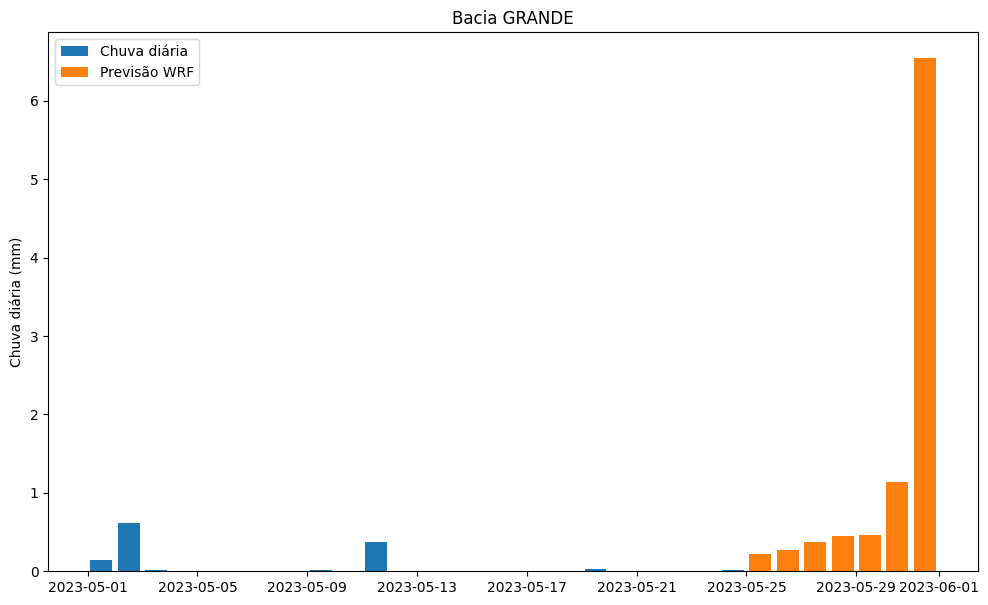

In [ ]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(12, 7))

ax.bar(x=rain_ts.index, height=rain_ts.values, label='Chuva diária')
ax.bar(x=forecast_ts.index, height=forecast_ts.values, label='Previsão WRF')
ax.legend()
ax.set_title('Bacia GRANDE')
ax.set_ylabel('Chuva diária (mm)')

/tmp/ipykernel_86899/1334702196.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rain_ts.append(forecast_ts).plot(kind='bar', figsize=(15, 8))


<Axes: xlabel='time'>

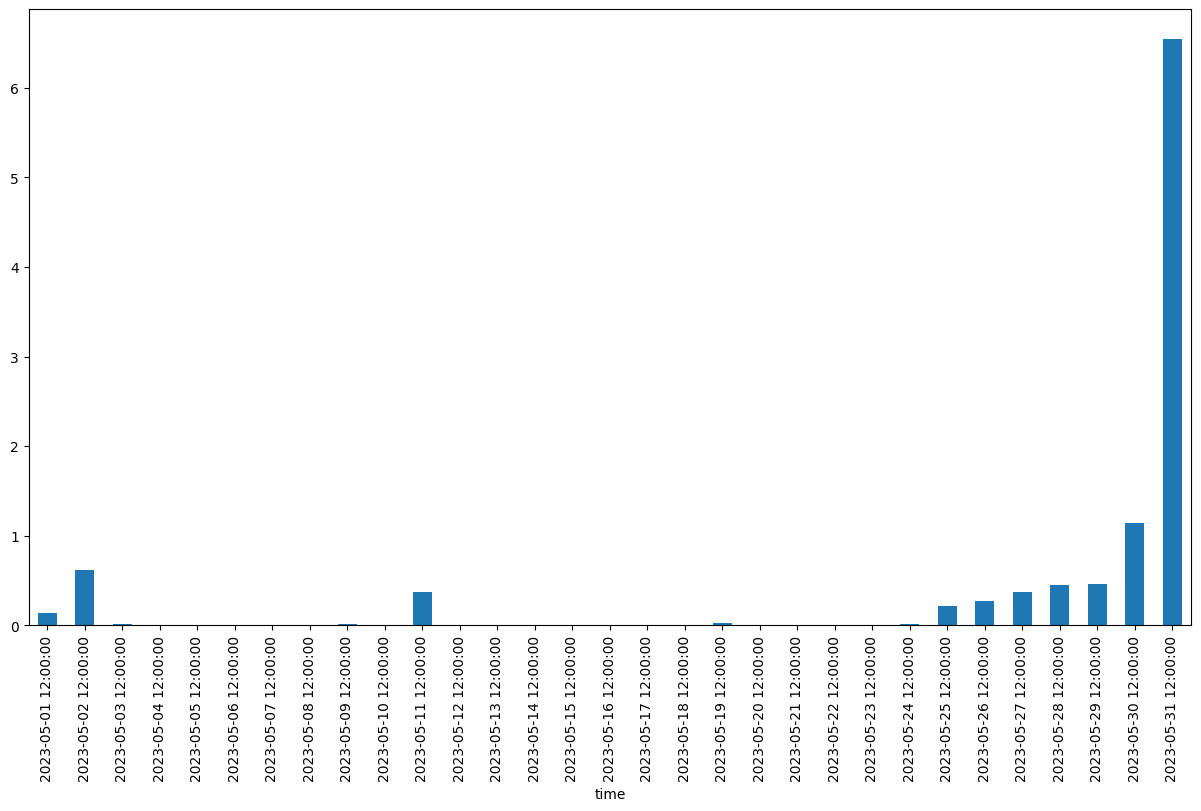

In [ ]:
rain_ts.append(forecast_ts).plot(kind='bar', figsize=(15, 8))

In [ ]:
import rasterio as rio
import rioxarray as xrio

In [ ]:
xrio.open_rasterio('/workspaces/bases/rain.nc')

RasterioIOError: '/workspaces/bases/rain.nc' not recognized as a supported file format.

In [ ]:
dset = xr.open_dataset('/workspaces/bases/rain.nc')

In [ ]:
da = dset['pacum']
from rasterio.transform import from_origin


In [ ]:
da

<xarray.DataArray 'pacum' (time: 1, lat: 691, lon: 474)>
[327534 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -34.85 -34.75 -34.65
  * lat      (lat) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
  * time     (time) datetime64[ns] 2000-06-02T12:00:00

In [ ]:
transform = from_origin(da.lon.min(), da.lat.max(), da.lon.diff(dim='x')[0], -da.lat.diff(dim='y')[0])


In [ ]:
from rasterio.transform import from_bounds

In [ ]:
da.lon.min()

<xarray.DataArray 'lon' ()>
array(-81.95)

In [ ]:
float(da.lon.min())

-81.94999999999999

In [ ]:
transform = from_bounds(float(da.lon.min()), float(da.lat.min()), 
                        float(da.lon.max()), float(da.lat.max()), 474, 691)

In [ ]:
transform

Affine(0.09978902953586498, 0.0, -81.94999999999999,
       0.0, -0.09985528219971057, 12.850000000000001)

In [ ]:
dar = xrio.open_rasterio('../tmp/DAILY_RAIN/MERGE_CPTEC_20210402.grib2')

In [ ]:
dar.shape

(2, 924, 1001)

In [ ]:
dset = rio.open('../tmp/DAILY_RAIN/MERGE_CPTEC_20210402.grib2')

In [ ]:
dset.shape

(924, 1001)

In [ ]:
dset.transform

Affine(0.09978902953586498, 0.0, -81.94999999999999,
       0.0, -0.09985528219971057, 12.850000000000001)

In [ ]:
meta = {
    'driver': 'GTiff',
    'height': da.shape[1],
    'width': da.shape[2],
    'count': 1,
    'dtype': str(da.dtype),
    'crs': 'epsg:4326',
    'transform': transform,
    'compress': 'deflate',  # Add the compression type here
}

In [ ]:
da.values.shape

(1, 691, 474)

In [ ]:
import numpy as np
# Path to the output GeoTiff file
output_filename = "/workspaces/bases/rain.tif"

with rio.open(output_filename, 'w', **meta) as dst:
    dst.write(np.flip(da.values.squeeze(), axis=0), 1)

In [ ]:
output_filename = "/workspaces/bases/rain.tif"

dset = rio.open(output_filename)

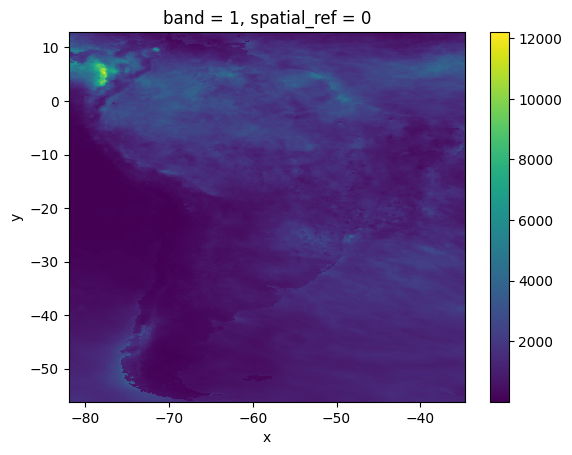

In [ ]:
xrio.open_rasterio(output_filename).plot()

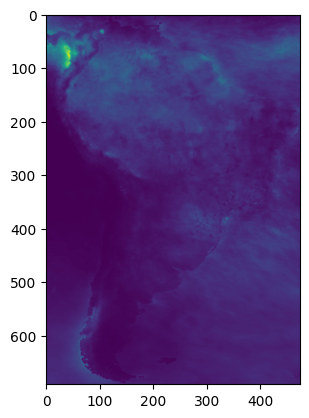

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(dset.read().squeeze())

In [ ]:
from rasterio.plot import show

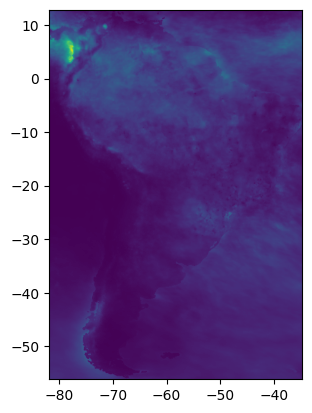

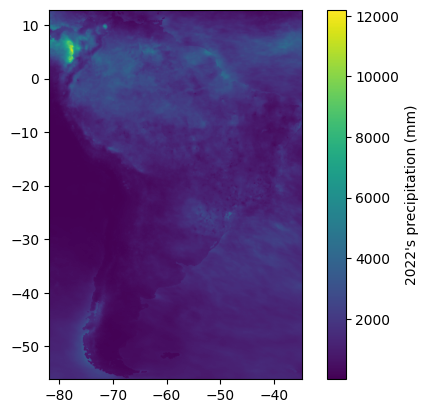

In [ ]:
ax = show(dset)
cbar = ax.figure.colorbar(ax.images[0],ax=ax)
cbar.set_label("2022's precipitation (mm)")
ax.figure

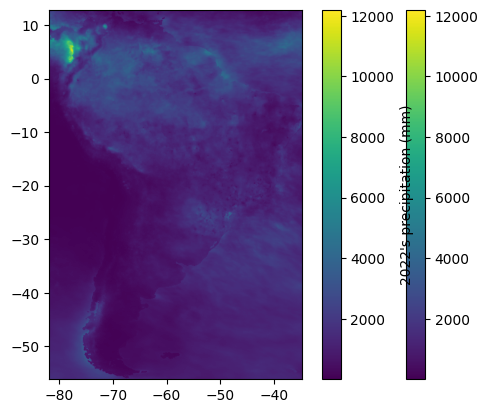

In [ ]:
pts = shp.sample_points(10).explode()

/tmp/ipykernel_61037/2881509899.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  pts = shp.sample_points(10).explode()


In [ ]:
pts

0  0    POINT (-49.38313 -20.69051)
   1    POINT (-48.25720 -20.68582)
   2    POINT (-47.88376 -20.69579)
   3    POINT (-47.44560 -20.98926)
   4    POINT (-46.95247 -20.49588)
   5    POINT (-46.61332 -21.91553)
   6    POINT (-46.44453 -20.93163)
   7    POINT (-45.73039 -22.58829)
   8    POINT (-45.49361 -21.90172)
   9    POINT (-45.34016 -20.76478)
Name: sampled_points, dtype: geometry

In [ ]:
pts.to_list()

[<POINT (-49.383 -20.691)>,
 <POINT (-48.257 -20.686)>,
 <POINT (-47.884 -20.696)>,
 <POINT (-47.446 -20.989)>,
 <POINT (-46.952 -20.496)>,
 <POINT (-46.613 -21.916)>,
 <POINT (-46.445 -20.932)>,
 <POINT (-45.73 -22.588)>,
 <POINT (-45.494 -21.902)>,
 <POINT (-45.34 -20.765)>]

In [ ]:
coords = [(x, y) for x, y in zip(pts.x, pts.y)]

[array([1150.125]),
 array([1114.1875]),
 array([1399.]),
 array([1330.3125]),
 array([938.875]),
 array([1618.8125]),
 array([1634.3125]),
 array([1386.5]),
 array([1465.]),
 array([1176.875])]

In [ ]:
gdf = pts.to_frame()
gdf['values'] = list(dset.sample(coords))

In [ ]:
gdf

sampled_points       values
0 0  POINT (-49.38313 -20.69051)   [1150.125]
  1  POINT (-48.25720 -20.68582)  [1114.1875]
  2  POINT (-47.88376 -20.69579)     [1399.0]
  3  POINT (-47.44560 -20.98926)  [1330.3125]
  4  POINT (-46.95247 -20.49588)    [938.875]
  5  POINT (-46.61332 -21.91553)  [1618.8125]
  6  POINT (-46.44453 -20.93163)  [1634.3125]
  7  POINT (-45.73039 -22.58829)     [1386.5]
  8  POINT (-45.49361 -21.90172)     [1465.0]
  9  POINT (-45.34016 -20.76478)   [1176.875]

In [ ]:
# attrs = list(dset.sample(coords))
# gpd.GeoDataFrame([pts, attrs])

gdf = pts.to_frame()
gdf['rain'] = attrs

In [ ]:
gdf

sampled_points         rain
0 0  POINT (-49.38313 -20.69051)   [1150.125]
  1  POINT (-48.25720 -20.68582)  [1114.1875]
  2  POINT (-47.88376 -20.69579)     [1399.0]
  3  POINT (-47.44560 -20.98926)  [1330.3125]
  4  POINT (-46.95247 -20.49588)    [938.875]
  5  POINT (-46.61332 -21.91553)  [1618.8125]
  6  POINT (-46.44453 -20.93163)  [1634.3125]
  7  POINT (-45.73039 -22.58829)     [1386.5]
  8  POINT (-45.49361 -21.90172)     [1465.0]
  9  POINT (-45.34016 -20.76478)   [1176.875]